In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [3]:
file_path_trainC = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx"
train_cat = pd.read_excel(file_path_trainC)
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [5]:
file_path_trainFCM = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
train_FCM = pd.read_csv(file_path_trainFCM)
train_FCM.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [6]:
file_path_trainQ = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx"
train_Quant = pd.read_excel(file_path_trainQ)
train_Quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [9]:
file_path_trainS = file_path_trainQ = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN/TRAINING_SOLUTIONS.xlsx"
train_Solutions = pd.read_excel(file_path_trainS)
train_Solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [11]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [13]:
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

Barratt_Barratt_P2_Occ
0     287
45    239
35    195
30    149
40    116
15     86
20     41
5      38
10     37
25     25
Name: count, dtype: int64

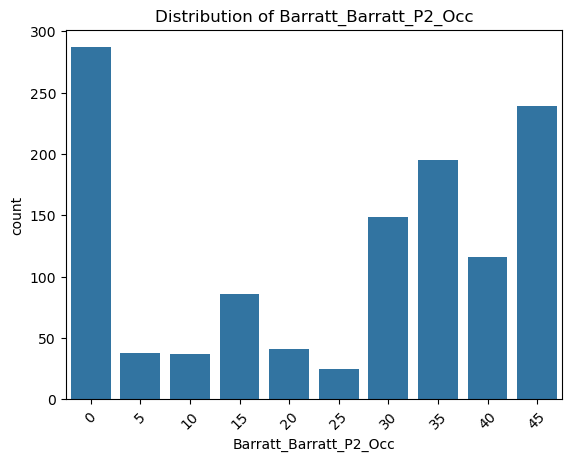

In [15]:
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

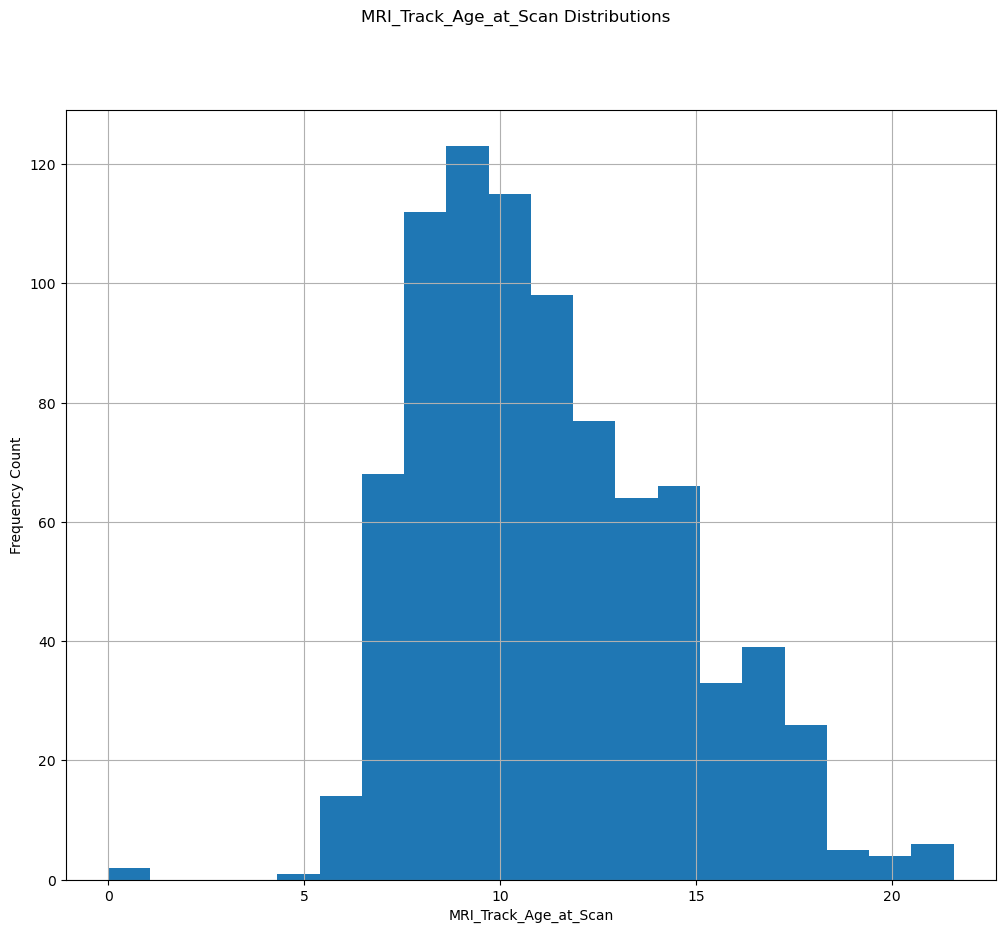

In [17]:
train_Quant['MRI_Track_Age_at_Scan'].hist(figsize=(12,10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()

In [19]:
# ADHD distribution
train_Solutions['ADHD_Outcome'].value_counts()

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

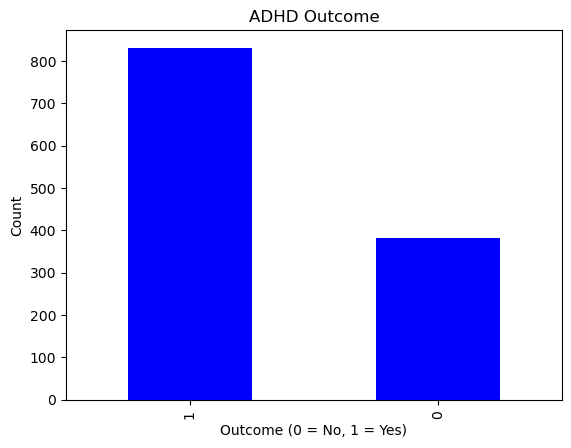

In [21]:
train_Solutions['ADHD_Outcome'].value_counts().plot(kind='bar', color='blue')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [23]:
#Gender distribution - address this, could cause bias in modeling, look at during data preparation
train_Solutions['Sex_F'].value_counts()

Sex_F
0    797
1    416
Name: count, dtype: int64

train_Solutions['Sex_F'].value_counts().plot(kind='bar', color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

Quantatative Data

In [27]:
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

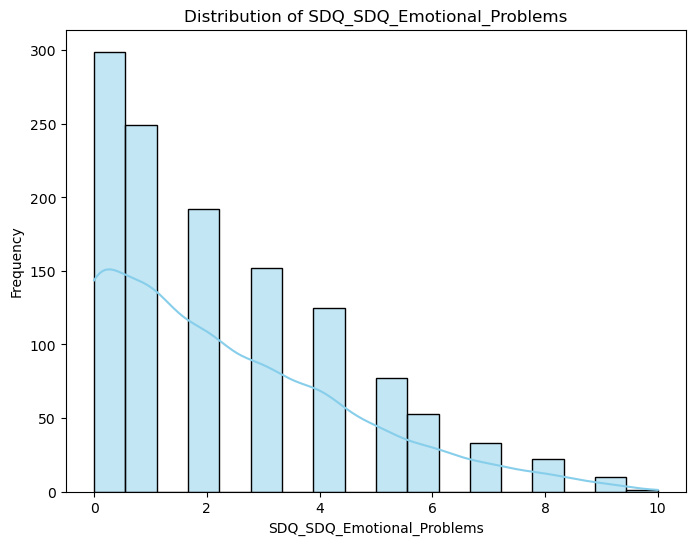

In [29]:
#Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8,6))
sns.histplot(train_Quant['SDQ_SDQ_Emotional_Problems'], kde=True, color = 'skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

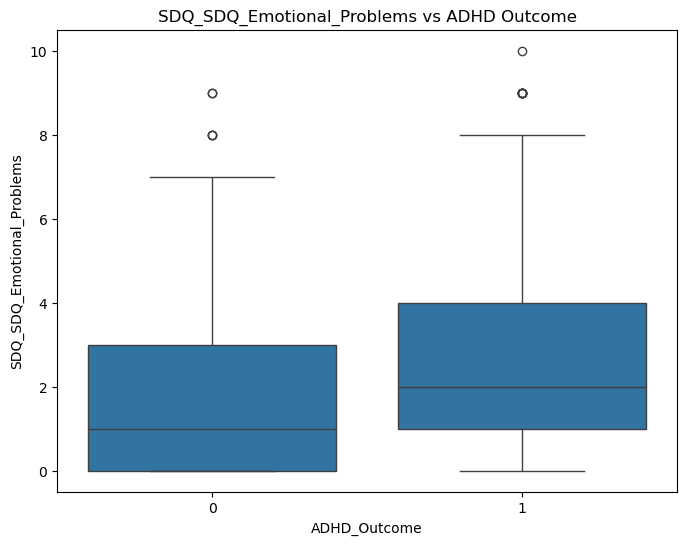

In [31]:
# Check for correlation with ADHD outcome
train_Quant_copy = train_Quant.copy()
train_Quant_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

plt.figure(figsize=(8,6))
sns.boxplot(x='ADHD_Outcome', y = 'SDQ_SDQ_Emotional_Problems', data=train_Quant_copy)
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD_Outcome')
plt.ylabel('SDQ_SDQ_Emotional_Problems')
plt.show()

Categorical Data

In [34]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

'Barratt_Barratt_P1_Edu', indicates the Parent 1 level of education
3=Less than 7th grade\
6=Junior high/Middle school (9th grade)\
9=Partial high school (10th or 11th grade)\
12=High school graduate\
15=Partial college (at least one year)\
18=College education\
21=Graduate degree

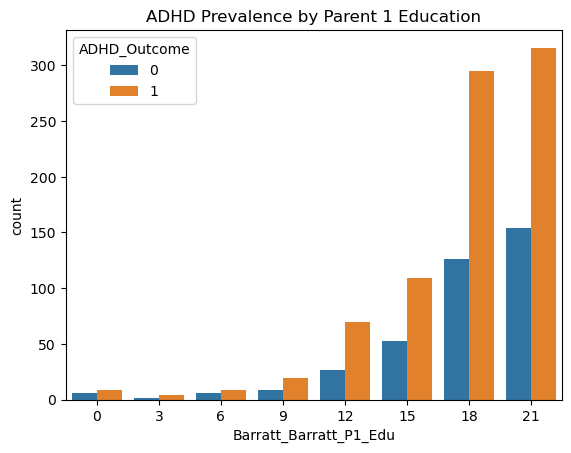

In [37]:
sns.countplot(data=train_cat, x = 'Barratt_Barratt_P1_Edu', hue = train_Solutions['ADHD_Outcome'])
plt.title('ADHD Prevalence by Parent 1 Education')
plt.show()

In [39]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

Barratt_Barratt_P1_Edu
21    470
18    421
15    162
12     97
9      28
0      15
6      15
3       5
Name: count, dtype: int64

In [41]:
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P1_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Barratt_Barratt_P1_Edu
0     0.600000
3     0.800000
6     0.600000
9     0.678571
12    0.721649
15    0.672840
18    0.700713
21    0.672340
Name: ADHD_Outcome, dtype: float64


**Pre-Processing**

In [44]:
# Set up for one hot encoding
for col in train_cat.select_dtypes(include='int').columns:
    train_cat[col] = train_cat[col].astype('category')

In [46]:
# Creating a list of all of the columns except the first
columns_to_encode = train_cat.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [48]:
# encoding categorical data
train_encoded = pd.get_dummies(train_cat[columns_to_encode], drop_first=True)
train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_32399/2479499898.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [50]:
print(train_cat.columns)

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')


In [52]:
columns_to_encode

['Basic_Demos_Enroll_Year',
 'Basic_Demos_Study_Site',
 'PreInt_Demos_Fam_Child_Ethnicity',
 'PreInt_Demos_Fam_Child_Race',
 'MRI_Track_Scan_Location',
 'Barratt_Barratt_P1_Edu',
 'Barratt_Barratt_P1_Occ',
 'Barratt_Barratt_P2_Edu',
 'Barratt_Barratt_P2_Occ']


KeyError: "['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ'] 

In [55]:
# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([train_cat.drop(columns=columns_to_encode), train_encoded], axis=1)

# ensure it looks correct
cat_train_final.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,UmrK0vMLopoR,0.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,CPaeQkhcjg7d,1.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nb4EetVPm3gs,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p4vPhVu91o4b,0.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Train and Test Dataframes**

In [58]:
# load in test categorical dataframe

file_path_testC = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TEST/TEST_CATEGORICAL.xlsx"
test_cat = pd.read_excel(file_path_testC)
test_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [60]:
# convert our int variables to categories
for col in test_cat.select_dtypes(include='int').columns:
    test_cat[col] = test_cat[col].astype('category')

# Encode categorical variables in test
test_encoded = pd.get_dummies(test_cat[columns_to_encode], drop_first=True)
test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Ensure test_encoded has the same columns as train_encoded
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # Add missing columns with 0 values

# Ensure test_encoded columns are in the same order as train_encoded
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

# Combine encoded columns with the rest of the DataFrame
cat_test_final = pd.concat([test_cat.drop(columns=columns_to_encode), test_encoded], axis=1)

cat_test_final.head()

/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_32399/2044556609.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,Cfwaf5FX7jWK,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vhGrzmvA3Hjq,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ULliyEXjy4OV,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LZfeAb1xMtql,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,EnFOUv0YK1RG,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Merging Data Frames**

In [63]:
train_cat_FCM = pd.merge(cat_train_final, train_FCM, on = 'participant_id')

In [65]:
train_df = pd.merge(train_cat_FCM, train_Quant, on = 'participant_id')

train_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,0.0,1,0,0,0,0,0,0,0,...,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,1.0,0,0,0,1,0,0,1,0,...,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,1.0,1,0,0,0,0,0,0,0,...,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,0.0,0,0,1,0,0,0,1,0,...,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,1,0,...,1,18,4,11,4,10,7,3,9,8.940679


**Merge test dataframes**

In [68]:
file_path_testFCM = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"
test_FCM = pd.read_csv(file_path_testFCM)

file_path_testQ = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TEST/TEST_QUANTITATIVE_METADATA.xlsx"
test_Quant = pd.read_excel(file_path_testQ)

test_cat_FCM = pd.merge(cat_test_final, test_FCM, on = 'participant_id')

test_df = pd.merge(test_cat_FCM, test_Quant, on = 'participant_id')

# ensure it looks accurate
test_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,0.0,0,0,0,0,0,0,0,0,...,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,0.0,0,0,0,0,0,0,0,0,...,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,0.0,0,0,0,0,0,0,0,0,...,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,0.0,0,0,0,0,0,0,0,0,...,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,2.0,0,0,0,0,0,0,0,0,...,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [70]:
len(test_df.columns)

19973

## NA Values

- Consider different ways to fill in null values, besides just using the mean
- I am going to attempt to build a KNN model that predicts null values
1. Fill missing values temporarily so KNN can work.
2. Standardize/normalize continuous features.
3. Train KNN model on data with no missing values.
4. Impute missing values using KNN.
5. Evaluate and fine-tune the model.
6. Reapply imputed values to the original dataset.
7. Check for remaining missing values.

In [74]:
# check how many NA values we have
print(train_df.isna().sum())

participant_id                        0
PreInt_Demos_Fam_Child_Ethnicity     11
Basic_Demos_Enroll_Year_2016          0
Basic_Demos_Enroll_Year_2017          0
Basic_Demos_Enroll_Year_2018          0
                                   ... 
SDQ_SDQ_Hyperactivity                 0
SDQ_SDQ_Internalizing                 0
SDQ_SDQ_Peer_Problems                 0
SDQ_SDQ_Prosocial                     0
MRI_Track_Age_at_Scan               360
Length: 19973, dtype: int64


**First, we will do it for the PreInt_Demos_Fam_Child_Ethnicity column**

In [77]:
# Accessing all rows where PreInt_Demos_Fam_Child_Ethnicity is null, will predict with this data
rows_with_null_PiDFCE = train_df[train_df['PreInt_Demos_Fam_Child_Ethnicity'].isna()]

test_rows_with_null_PiDFCE = test_df[test_df['PreInt_Demos_Fam_Child_Ethnicity'].isna()]

# Filling in null values of other cols with mean from full training data
rows_with_null_PiDFCE.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)

/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_32399/1515129365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_null_PiDFCE.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)


In [79]:
# Filling the testing data null values, besides PreInt_Demos_Fam_Child_Ethnicity column
for col in test_rows_with_null_PiDFCE.columns:
    if col != 'PreInt_Demos_Fam_Child_Ethnicity' and test_rows_with_null_PiDFCE[col].isna().sum() > 0:  # Skip PreInt_Demos_Fam_Child_Ethnicity and check if column has NaN values
        if test_rows_with_null_PiDFCE[col].dtype in ['float64', 'int64']:  # Ensure it's numeric
            test_rows_with_null_PiDFCE[col] = test_rows_with_null_PiDFCE[col].fillna(test_df[col].mean())  # Avoid inplace
        else:
            print(f"Skipping non-numeric column: {col}")


/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_32399/1189566275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rows_with_null_PiDFCE[col] = test_rows_with_null_PiDFCE[col].fillna(test_df[col].mean())  # Avoid inplace


In [80]:
test_rows_with_null_PiDFCE.isna().sum()

participant_id                      0
PreInt_Demos_Fam_Child_Ethnicity    3
Basic_Demos_Enroll_Year_2016        0
Basic_Demos_Enroll_Year_2017        0
Basic_Demos_Enroll_Year_2018        0
                                   ..
SDQ_SDQ_Hyperactivity               0
SDQ_SDQ_Internalizing               0
SDQ_SDQ_Peer_Problems               0
SDQ_SDQ_Prosocial                   0
MRI_Track_Age_at_Scan               0
Length: 19973, dtype: int64

In [83]:
# Creating training dataset to predict null values

# Dataframe without null values in PiDFCE column
train_PiDFCE_df = train_df[~train_df.index.isin(rows_with_null_PiDFCE.index)]

# Fill in other null column with mean
train_PiDFCE_df.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)

# Xtrain = all columns besides train d
# Ytrain = pidfce from train_df.drop rows with ull pidfce


/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_32399/252768032.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_PiDFCE_df.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)


In [84]:
train_PiDFCE_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,0.0,1,0,0,0,0,0,0,0,...,0,6,1,5,0,5,1,0,10,11.245678
1,CPaeQkhcjg7d,1.0,0,0,0,1,0,0,1,0,...,0,18,6,8,7,8,10,4,5,11.245678
2,Nb4EetVPm3gs,1.0,1,0,0,0,0,0,0,0,...,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,0.0,0,0,1,0,0,0,1,0,...,6,24,4,16,9,10,8,4,6,11.245678
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,1,0,...,1,18,4,11,4,10,7,3,9,8.940679


In [85]:
train_PiDFCE_df.shape

(1202, 19973)

In [89]:
#Takes 9-10 minutes to run this cell
# Calculate the correlation matrix
# correlation_matrix = train_PiDFCE_df.drop('participant_id', axis=1).corr()

# # Extract the correlation values for column 'a'
# correlations = correlation_matrix['PreInt_Demos_Fam_Child_Ethnicity']

# # Step 3: Sort the correlations and pick the top 10, excluding column 'a' itself
# top_10_columns = correlations.drop('PreInt_Demos_Fam_Child_Ethnicity').abs().sort_values(ascending=False).head(10)

# print(top_10_columns)

PreInt_Demos_Fam_Child_Race_2     0.293147\
PreInt_Demos_Fam_Child_Race_10    0.258507\
Barratt_Barratt_P2_Occ_45         0.151849\
PreInt_Demos_Fam_Child_Race_8     0.147055\
Barratt_Barratt_P2_Edu_21         0.145573\
43throw_181thcolumn               0.132470\
36throw_51thcolumn                0.122027\
68throw_110thcolumn               0.120913\
158throw_189thcolumn              0.113612\
30throw_192thcolumn               0.111799

In [91]:
cols_to_include = ['PreInt_Demos_Fam_Child_Race_2', 'PreInt_Demos_Fam_Child_Race_10', 'Barratt_Barratt_P2_Occ_45']

In [94]:
train_PiDFCE_df[cols_to_include].head()

,PreInt_Demos_Fam_Child_Race_2,PreInt_Demos_Fam_Child_Race_10,Barratt_Barratt_P2_Occ_45
0,0,0,1
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [96]:

# X = train_PiDFCE_df.drop('PreInt_Demos_Fam_Child_Ethnicity', axis=1)  # Features
X = train_PiDFCE_df[cols_to_include]
y = train_PiDFCE_df['PreInt_Demos_Fam_Child_Ethnicity']               # Target variable

# Drop participant ids
# X = X.drop(columns = ['participant_id'])
# y = y.drop(columns = ['participant_id'])

In [98]:
print(X.shape)
print(y.shape)

(1202, 3)
(1202,)


In [99]:
# KNN Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Step 2: Load and prepare the data
# Example: Assuming you have a DataFrame `df` with features and a target variable 'target'
# df = pd.read_csv("your_data.csv")

# X = train_PiDFCE_df.drop('PreInt_Demos_Fam_Child_Ethnicity', axis=1)  # Features
# y = train_PiDFCE_df['PreInt_Demos_Fam_Child_Ethnicity']               # Target variable

# # Drop participant ids
# X = X.drop(columns = ['participant_id'])
# y = y.drop(columns = ['participant_id'])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Step 4: Scale/Normalize features (optional but recommended for KNN)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=7)  # Set k=5 (you can tune this)
# knn.fit(X_train_scaled, y_train)
knn.fit(X_train, y_train)

# Step 6: Make predictions
# y_pred = knn.predict(X_test_scaled)
y_pred = knn.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

f1_macro = f1_score(y_test, y_pred, average='macro')  # Macro average
f1_weighted = f1_score(y_test, y_pred, average='weighted')  # Weighted average
f1_micro = f1_score(y_test, y_pred, average='micro')  # Micro average

print(f"Macro F1 Score: {f1_macro}")
print(f"Weighted F1 Score: {f1_weighted}")
print(f"Micro F1 Score: {f1_micro}")


new_PiDFCE_vals = knn.predict(rows_with_null_PiDFCE[cols_to_include])
new_test_PiDFCE_vals = knn.predict(test_rows_with_null_PiDFCE[cols_to_include])

# new_PiDFCE_vals = knn.predict(rows_with_null_PiDFCE.drop(columns=['PreInt_Demos_Fam_Child_Ethnicity', 'participant_id']))
# new_test_PiDFCE_vals = knn.predict(test_rows_with_null_PiDFCE.drop(columns=['PreInt_Demos_Fam_Child_Ethnicity', 'participant_id']))


Accuracy: 0.79
Macro F1 Score: 0.4134834584375868
Weighted F1 Score: 0.7451386466253426
Micro F1 Score: 0.7867036011080333


In [102]:
new_test_PiDFCE_vals

array([0., 0., 0.])

In [103]:
# Fill in null values:
train_df.loc[train_df['PreInt_Demos_Fam_Child_Ethnicity'].isna(), 'PreInt_Demos_Fam_Child_Ethnicity'] = new_PiDFCE_vals
print(train_df.isna().sum())

test_df.loc[test_df['PreInt_Demos_Fam_Child_Ethnicity'].isna(), 'PreInt_Demos_Fam_Child_Ethnicity'] = new_test_PiDFCE_vals
print(test_df.isna().sum())

participant_id                        0
PreInt_Demos_Fam_Child_Ethnicity      0
Basic_Demos_Enroll_Year_2016          0
Basic_Demos_Enroll_Year_2017          0
Basic_Demos_Enroll_Year_2018          0
                                   ... 
SDQ_SDQ_Hyperactivity                 0
SDQ_SDQ_Internalizing                 0
SDQ_SDQ_Peer_Problems                 0
SDQ_SDQ_Prosocial                     0
MRI_Track_Age_at_Scan               360
Length: 19973, dtype: int64
participant_id                       0
PreInt_Demos_Fam_Child_Ethnicity     0
Basic_Demos_Enroll_Year_2016         0
Basic_Demos_Enroll_Year_2017         0
Basic_Demos_Enroll_Year_2018         0
                                    ..
SDQ_SDQ_Hyperactivity               30
SDQ_SDQ_Internalizing               30
SDQ_SDQ_Peer_Problems               30
SDQ_SDQ_Prosocial                   30
MRI_Track_Age_at_Scan                0
Length: 19973, dtype: int64


**Now we will do it for the MRI_Track_Age_at_Scan column**

In [105]:
# Accessing all rows where MRI_Track_Age_at_Scan is null, will predict with this data
rows_with_null_MRITAS = train_df[train_df['MRI_Track_Age_at_Scan'].isna()]

# Filling in null values of other cols with mean from full training data
rows_with_null_MRITAS.fillna({'PreInt_Demos_Fam_Child_Ethnicity':train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_32399/533281879.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_null_MRITAS.fillna({'PreInt_Demos_Fam_Child_Ethnicity':train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)


In [108]:
# Creating training dataset to predict null values

# Dataframe without null values in PiDFCE column
train_MRITAS_df = train_df[~train_df.index.isin(rows_with_null_MRITAS.index)]

# Fill in other null column with mean
train_MRITAS_df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_32399/1831191798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_MRITAS_df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)


In [109]:
train_MRITAS_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
2,Nb4EetVPm3gs,1.0,1,0,0,0,0,0,0,0,...,1,14,2,8,5,7,6,4,9,8.239904
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,1,0,...,1,18,4,11,4,10,7,3,9,8.940679
6,DgRP31gu21O9,0.0,0,0,1,0,0,0,1,0,...,0,9,1,5,1,5,4,3,10,16.768195
7,ClMA0FwvFgLY,0.0,0,0,0,1,0,0,0,0,...,3,16,3,11,6,8,5,2,6,11.221309
8,NVUkahaJ6fhf,0.0,0,0,0,0,0,0,0,0,...,5,23,6,14,2,9,9,3,10,8.570841


In [110]:
#Takes 9-10 minutes to run this cell
# Calculate the correlation matrix
# correlation_matrix = train_MRITAS_df.drop('participant_id', axis=1).corr()

# # Extract the correlation values for column 'a'
# correlations = correlation_matrix['MRI_Track_Age_at_Scan']

# # Step 3: Sort the correlations and pick the top 10, excluding column 'a' itself
# top_10_columns = correlations.drop('MRI_Track_Age_at_Scan').abs().sort_values(ascending=False).head(10)

# print(top_10_columns)

In [112]:
cols_to_include_2 = ['APQ_P_APQ_P_PM', '161throw_190thcolumn', '7throw_9thcolumn', '106throw_108thcolumn', '69throw_80thcolumn','51throw_158thcolumn', '80throw_177thcolumn', '92throw_93thcolumn']

APQ_P_APQ_P_PM          0.575243\
161throw_190thcolumn    0.264117\
7throw_9thcolumn        0.250352\
106throw_108thcolumn    0.249552\
69throw_80thcolumn      0.234965\
156throw_158thcolumn    0.201897\
69throw_159thcolumn     0.201224\
51throw_158thcolumn     0.198524\
80throw_177thcolumn     0.198048\
92throw_93thcolumn      0.197352

In [114]:
train_MRITAS_df.shape

(853, 19973)

In [118]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace with your actual data)
# Example: df = pd.read_csv('your_data.csv')

# Example: Assume 'target' is the column you want to predict
X = train_MRITAS_df[cols_to_include_2]  # Features (independent variables)
y = train_MRITAS_df['MRI_Track_Age_at_Scan']  # Target variable (dependent variable)

# Step 1: Data Preprocessing (Optional but recommended)
# If needed, scale your features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Optional if you want to scale the features

# Step 2: Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Initialize the model
model = LinearRegression()

# Step 4: Train the model on training data
model.fit(X_train, y_train)

# Step 5: Make predictions on test data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model using various metrics
# 1. R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 4. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


new_MRITAS_vals = model.predict(rows_with_null_MRITAS[cols_to_include_2])

R²: 0.46451444945364107
Mean Absolute Error (MAE): 1.8404247211783078
Mean Squared Error (MSE): 5.330261933620401
Root Mean Squared Error (RMSE): 2.308736003448727


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [121]:
# X = train_MRITAS_df[cols_to_include_2]  # Features
# y = train_MRITAS_df['MRI_Track_Age_at_Scan']               # Target variable

In [122]:

# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Step 2: Load and prepare the data
# # Example: Assuming you have a DataFrame `df` with features and a target variable 'target'
# # df = pd.read_csv("your_data.csv")

# # X = train_MRITAS_df.drop('MRI_Track_Age_at_Scan', axis=1)  # Features
# # y = train_MRITAS_df['MRI_Track_Age_at_Scan']               # Target variable

# # # Drop participant ids
# # X = X.drop(columns = ['participant_id'])
# # y = y.drop(columns = ['participant_id'])

# # Step 3: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # # Step 4: Scale/Normalize features (optional but recommended for KNN)
# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # Step 5: Initialize and train the KNN model
# knn = KNeighborsRegressor(n_neighbors=15)  # Set k=5 (you can tune this)
# # knn.fit(X_train_scaled, y_train)
# knn.fit(X_train, y_train)

# # Step 6: Make predictions
# # y_pred = knn.predict(X_test_scaled)
# y_pred = knn.predict(X_test)

# # Step 7: Evaluate the model
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Assuming you have already trained your KNeighborsRegressor model
# # knn.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = knn.predict(X_test)

# # Calculate evaluation metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)  # RMSE is the square root of MSE
# r2 = r2_score(y_test, y_pred)

# # Print the results
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R-squared (R²): {r2:.2f}")

# # new_MRITAS_vals = knn.predict(rows_with_null_MRITAS.drop(columns=['MRI_Track_Age_at_Scan', 'participant_id']))
# new_MRITAS_vals = knn.predict(rows_with_null_MRITAS[cols_to_include_2])

In [123]:
# Fill Null Values
train_df.loc[train_df['MRI_Track_Age_at_Scan'].isna(), 'MRI_Track_Age_at_Scan'] = new_MRITAS_vals
train_df.isna().sum()

participant_id                      0
PreInt_Demos_Fam_Child_Ethnicity    0
Basic_Demos_Enroll_Year_2016        0
Basic_Demos_Enroll_Year_2017        0
Basic_Demos_Enroll_Year_2018        0
                                   ..
SDQ_SDQ_Hyperactivity               0
SDQ_SDQ_Internalizing               0
SDQ_SDQ_Peer_Problems               0
SDQ_SDQ_Prosocial                   0
MRI_Track_Age_at_Scan               0
Length: 19973, dtype: int64

In [128]:
test_df.isna().sum()

participant_id                       0
PreInt_Demos_Fam_Child_Ethnicity     0
Basic_Demos_Enroll_Year_2016         0
Basic_Demos_Enroll_Year_2017         0
Basic_Demos_Enroll_Year_2018         0
                                    ..
SDQ_SDQ_Hyperactivity               30
SDQ_SDQ_Internalizing               30
SDQ_SDQ_Peer_Problems               30
SDQ_SDQ_Prosocial                   30
MRI_Track_Age_at_Scan                0
Length: 19973, dtype: int64

371 NaN values\
360 in MRI_Track_Age_at_Scan\
11 in PreInt_Demos_Fam_Child_Ethnicity

In [131]:
# fill NA values using the mean
train_df.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)
train_df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

print(train_df.isna().sum().sum())

0


In [133]:
# Using backward and foward fills (indicates using previous or the following data row in order to replace the missing values)
# I think this shouldn't do anything because above shows that there are no more null values
train_df.ffill(inplace = True)
print(train_df.isna().sum().sum())

0


In [145]:
# Fill NAs of test data

for col in test_df.columns:
    if test_df[col].isna().sum() > 0:  # Check if the column has NaN values
        if test_df[col].dtype in ['float64', 'int64']:  # Ensure it's numeric
            test_df[col] = test_df[col].fillna(test_df[col].mean())  # Avoid inplace
        else:
            print(f"Skipping non-numeric column: {col}")

In [147]:
test_df.isna().sum().sum()

0

In [151]:
train_df.to_csv('/Users/mayapatel/UCLA_WiDs_Team-21/train-edited.csv', index=False)
test_df.to_csv('/Users/mayapatel/UCLA_WiDs_Team-21/test-edited.csv', index=False)

Note to self: REMEMBER TO DO THE SAME TO TEST DATA!

## Machine Learning

In [79]:
file_path_trainS = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN/TRAINING_SOLUTIONS.xlsx"
train_Solutions = pd.read_excel(file_path_trainS)

In [80]:
X_train = train_df.drop(columns = ['participant_id'])
Y_train = train_Solutions.drop(columns = ['participant_id'])

In [81]:
Y_train.head()

,ADHD_Outcome,Sex_F
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1


In [82]:
# Step 1: Ensure that 'adhd' and 'sex' are in the Y_train DataFrame
Y_train = train_Solutions[['ADHD_Outcome', 'Sex_F']]  # Assuming 'adhd' and 'sex' are in train_Solutions

# Step 2: Calculate correlations between each feature in X_train and the target columns in Y_train
correlations = {}

for target_column in Y_train.columns:  # Loop over each target column ('adhd' and 'sex')
    corr_with_target = X_train.corrwith(Y_train[target_column])  # Calculate correlation with target column
    correlations[target_column] = corr_with_target  # Store the correlations for each target

# Step 3: Combine the results into a single DataFrame
correlations_df = pd.DataFrame(correlations)

# Step 4: Sort the correlations for both columns ('adhd' and 'sex') and find the top 20 features
# Combine both columns into a single list and get the top 20 correlated features
top_20_features = pd.concat([correlations_df['ADHD_Outcome'], correlations_df['Sex_F']], axis=1)

# Sort by the absolute correlation value and pick top 20
top_20_features = top_20_features.abs().mean(axis=1).sort_values(ascending=False).head(20)

# Print top 20 correlated features
print(top_20_features)

SDQ_SDQ_Hyperactivity           0.348755
SDQ_SDQ_Externalizing           0.317150
SDQ_SDQ_Difficulties_Total      0.255673
SDQ_SDQ_Generating_Impact       0.217470
SDQ_SDQ_Conduct_Problems        0.164142
SDQ_SDQ_Internalizing           0.156994
SDQ_SDQ_Emotional_Problems      0.156751
SDQ_SDQ_Prosocial               0.139272
SDQ_SDQ_Peer_Problems           0.119535
APQ_P_APQ_P_OPD                 0.106073
Basic_Demos_Enroll_Year_2016    0.100397
0throw_103thcolumn              0.099023
MRI_Track_Scan_Location_1       0.097615
164throw_189thcolumn            0.096994
164throw_173thcolumn            0.088341
152throw_156thcolumn            0.086939
74throw_77thcolumn              0.086213
74throw_189thcolumn             0.086008
31throw_66thcolumn              0.085709
158throw_191thcolumn            0.083851
dtype: float64


In [83]:
correlations_df.head()

,ADHD_Outcome,Sex_F
PreInt_Demos_Fam_Child_Ethnicity,0.032662,-0.007363
Basic_Demos_Enroll_Year_2016,-0.169820,0.030975
Basic_Demos_Enroll_Year_2017,-0.043665,0.020874
Basic_Demos_Enroll_Year_2018,0.103601,-0.001189
Basic_Demos_Enroll_Year_2019,0.070068,-0.047682


**XGBOOST**

In [85]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators = 100, learning_rate = 0.1, max_depth = 5)

In [86]:
# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

In [87]:
# Train the model
# It takes 6min and 45.8s to run
multioutput_classifier.fit(X_train, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

**Testing the Model**

In [89]:
participant_id = test_df['participant_id']

X_test = test_df.drop(columns = 'participant_id')

y_pred = multioutput_classifier.predict(X_test)

In [90]:
# Get the columns of the training and test data
train_columns = X_train.columns
test_columns = X_test.columns

# Find columns that are in the training data but not in the test data (missing columns)
missing_cols = set(train_columns) - set(test_columns)
print("Missing columns in the test data:", missing_cols)

# Find columns that are in the test data but not in the training data (extra columns)
extra_cols = set(test_columns) - set(train_columns)
print("Extra columns in the test data:", extra_cols)


Missing columns in the test data: set()
Extra columns in the test data: set()


Creating a dataframe of the participant IDs that we stored and our predicted values - This is what we submit on Kaggle

In [92]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(
    y_pred,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df = pd.concat([participant_id.reset_index(drop=True), predictions_df], axis=1)

# Print or save the DataFrame
print(result_df)

    participant_id  Predicted_Gender  Predicted_ADHD
0     Cfwaf5FX7jWK                 0               0
1     vhGrzmvA3Hjq                 1               0
2     ULliyEXjy4OV                 1               0
3     LZfeAb1xMtql                 0               0
4     EnFOUv0YK1RG                 1               0
..             ...               ...             ...
299   UadZfjdEg7eG                 0               0
300   IUEHiLmQAqCi                 1               1
301   cRySmCadYFRO                 0               0
302   E3MvDUtJadc5                 0               0
303   dQJXfyRazknD                 1               0

[304 rows x 3 columns]


**Evaluating Model** Using cross validation

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

In [95]:
def multi_output_accuracy(y_true, y_pred):
    # Ensure y_true and y_pred are NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Compute accuracy for each target variable and return the mean
    return np.mean([accuracy_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

In [96]:
# Create a scorer using scikit-learn's make_scorer
multi_output_scorer = make_scorer(multi_output_accuracy)

In [97]:
#Note: it takes 12 min to run this cell!
# Perform cross-validation on the training data
cv_scores = cross_val_score(multioutput_classifier, X_train, Y_train, cv=5, scoring=multi_output_scorer)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

# Cross-validation scores for each fold: [0.82304527 0.78600823 0.69341564 0.64669421 0.33471074]
# Mean CV score: 0.6567748188960311

Cross-validation scores for each fold: [0.82098765 0.7962963  0.69341564 0.64669421 0.33471074]
Mean CV score: 0.6584209094310105


Feature Engineering Notes:
* could improve accuracy
* domain knowledge (take a look at ADHD info resources on kaggle page)
* Normalization
* Feature scaling
* Dimensionality reduction (less features)
* Feature aggregation
* Feature selection (reduce dimensionality)



**Logistic Regression for Feature Selection**

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
model = LogisticRegression(max_iter=1000)
model.fit(train_df.drop(columns='participant_id'), train_Solutions['Sex_F'])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [102]:
# Get coefficients for Sex prediction
coefficients = pd.Series(model.coef_[0], index=train_df.drop(columns='participant_id').columns)

In [103]:
# Select top features for Sex prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

50throw_53thcolumn           0.448604
52throw_53thcolumn           0.432634
114throw_121thcolumn         0.427062
101throw_131thcolumn         0.426405
164throw_189thcolumn         0.425007
121throw_147thcolumn         0.423198
53throw_55thcolumn           0.415745
MRI_Track_Scan_Location_4    0.403198
160throw_190thcolumn         0.401027
89throw_91thcolumn           0.399822
dtype: float64


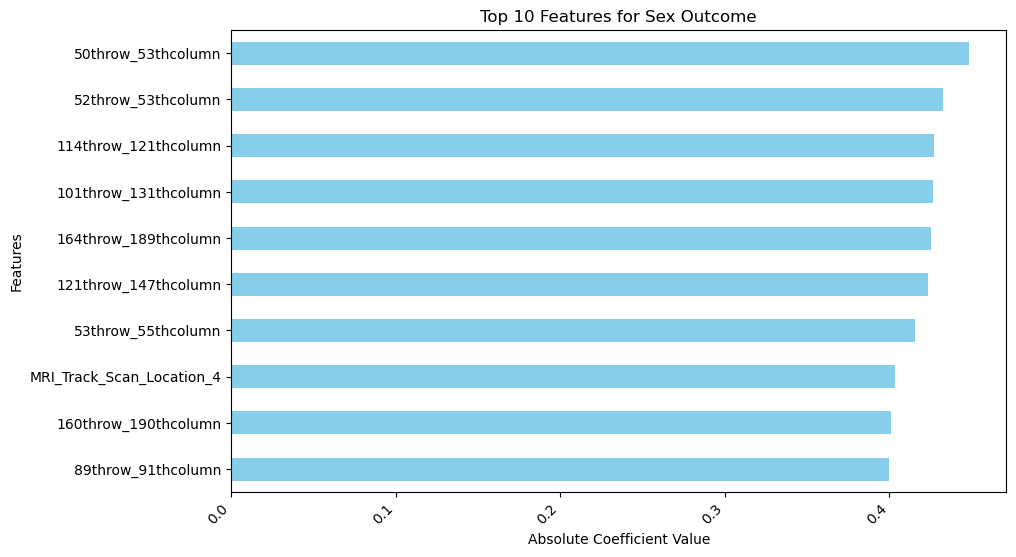

In [104]:
#Plotting the top 10 coefficents for Sex Outcome
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for Sex Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [105]:
model = LogisticRegression(max_iter=1000)
model.fit(train_df.drop(columns='participant_id'), train_Solutions['ADHD_Outcome'])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [106]:
# Get coefficients for ADHD_Outcome prediction
coefficients = pd.Series(model.coef_[0], index=train_df.drop(columns='participant_id').columns)

In [107]:
# Select top features for ADHD_Outcome prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

Basic_Demos_Enroll_Year_2016    0.820910
Barratt_Barratt_P1_Occ_25       0.495897
SDQ_SDQ_Hyperactivity           0.474830
Basic_Demos_Enroll_Year_2018    0.472849
Basic_Demos_Enroll_Year_2017    0.471808
MRI_Track_Scan_Location_3       0.434048
8throw_96thcolumn               0.413294
Barratt_Barratt_P1_Occ_35       0.407349
MRI_Track_Scan_Location_1       0.390112
0throw_6thcolumn                0.372952
dtype: float64


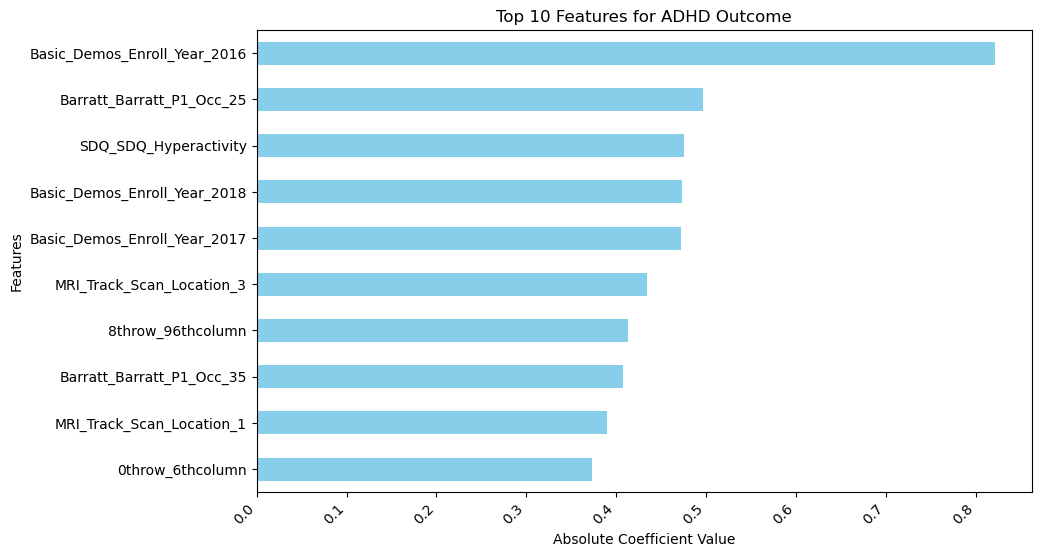

In [108]:
#Plotting the top 10 coefficents
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for ADHD Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

**Using L1 Regularization** Sex prediction

In [110]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(train_df.drop(columns='participant_id'), train_Solutions['Sex_F'])

LogisticRegression(penalty='l1', solver='liblinear')

In [111]:
selected_features_Sex = train_df.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features_Sex)

Index(['PreInt_Demos_Fam_Child_Ethnicity', 'Basic_Demos_Enroll_Year_2017',
       'Basic_Demos_Enroll_Year_2019', 'Basic_Demos_Study_Site_3',
       'Basic_Demos_Study_Site_4', 'PreInt_Demos_Fam_Child_Race_1',
       'PreInt_Demos_Fam_Child_Race_2', 'PreInt_Demos_Fam_Child_Race_9',
       'MRI_Track_Scan_Location_1', 'MRI_Track_Scan_Location_3',
       ...
       'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM',
       'APQ_P_APQ_P_PP', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'],
      dtype='object', length=407)


**Using L1 Regularization** ADHD prediction

In [113]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(train_df.drop(columns='participant_id'), train_Solutions['ADHD_Outcome'])

LogisticRegression(penalty='l1', solver='liblinear')

In [114]:
selected_features_ADHD = train_df.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features_ADHD)

Index(['PreInt_Demos_Fam_Child_Ethnicity', 'Basic_Demos_Enroll_Year_2016',
       'Basic_Demos_Enroll_Year_2017', 'Basic_Demos_Study_Site_3',
       'Basic_Demos_Study_Site_4', 'PreInt_Demos_Fam_Child_Race_1',
       'PreInt_Demos_Fam_Child_Race_8', 'MRI_Track_Scan_Location_1',
       'MRI_Track_Scan_Location_3', 'MRI_Track_Scan_Location_4',
       ...
       'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object', length=266)


**Row Selection and Reduction to Improve the Model**

In [116]:
# Step 1: Find common features between ADHD and Sex selected features
common_features = list(set(selected_features_ADHD) & set(selected_features_Sex))
print('PreInt_Demos_Fam_Child_Ethnicity' in common_features)

True


In [117]:
top_20_features_list = top_20_features.index.tolist()

# Step 2: Check if each of the top 20 features is in the common_features list
for feature in top_20_features_list:
    if feature in common_features:
        print(f"{feature} is in common_features")
    else:
        print(f"{feature} is NOT in common_features")

SDQ_SDQ_Hyperactivity is in common_features
SDQ_SDQ_Externalizing is in common_features
SDQ_SDQ_Difficulties_Total is NOT in common_features
SDQ_SDQ_Generating_Impact is in common_features
SDQ_SDQ_Conduct_Problems is NOT in common_features
SDQ_SDQ_Internalizing is NOT in common_features
SDQ_SDQ_Emotional_Problems is in common_features
SDQ_SDQ_Prosocial is in common_features
SDQ_SDQ_Peer_Problems is NOT in common_features
APQ_P_APQ_P_OPD is in common_features
Basic_Demos_Enroll_Year_2016 is NOT in common_features
0throw_103thcolumn is NOT in common_features
MRI_Track_Scan_Location_1 is in common_features
164throw_189thcolumn is NOT in common_features
164throw_173thcolumn is NOT in common_features
152throw_156thcolumn is NOT in common_features
74throw_77thcolumn is NOT in common_features
74throw_189thcolumn is NOT in common_features
31throw_66thcolumn is NOT in common_features
158throw_191thcolumn is NOT in common_features


In [118]:
X_train_2 = X_train[common_features]
X_test_2 = X_test[common_features]

**Fit and Transform Model**

In [120]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5)

In [121]:
# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

In [122]:
# Train the model
multioutput_classifier.fit(X_train_2, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [123]:
y_pred_2 = multioutput_classifier.predict(X_test_2)

In [124]:
# Convert predictions to a DataFrame
predictions_df_2 = pd.DataFrame(
    y_pred_2,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df_2 = pd.concat([participant_id.reset_index(drop=True), predictions_df_2], axis=1)

result_df_2.head()

,participant_id,Predicted_Gender,Predicted_ADHD
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,1,0
2,ULliyEXjy4OV,1,0
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0


**Evaluate the Model Using Cross Validation**

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

In [127]:
# Create a scorer using scikit-learn's make_scorer
multi_output_scorer = make_scorer(multi_output_accuracy)

In [128]:
# Perform cross-validation on the training data
cv_scores_2 = cross_val_score(multioutput_classifier, X_train_2, Y_train, cv=5, scoring=multi_output_scorer, n_jobs=-1)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores_2)
print("Mean CV score:", np.mean(cv_scores_2))

#Cross-validation scores for each fold: [0.78395062 0.76954733 0.70987654 0.66735537 0.43181818]
#Mean CV score: 0.6725096078631433

Cross-validation scores for each fold: [0.78806584 0.74897119 0.68106996 0.64669421 0.45247934]
Mean CV score: 0.6634561099207563


**Using correlated features**

In [130]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5)

In [131]:
# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

In [132]:
X_train_3 = X_train[top_20_features_list]
X_test_3 = X_test[top_20_features_list]

In [133]:
# Train the model
multioutput_classifier.fit(X_train_3, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [134]:
y_pred_3 = multioutput_classifier.predict(X_test_3)

In [135]:
# Convert predictions to a DataFrame
predictions_df_3 = pd.DataFrame(
    y_pred_3,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df_3 = pd.concat([participant_id.reset_index(drop=True), predictions_df_3], axis=1)

result_df_3.head()

,participant_id,Predicted_Gender,Predicted_ADHD
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,1,1
2,ULliyEXjy4OV,1,1
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0


In [136]:
# Create a scorer using scikit-learn's make_scorer
multi_output_scorer = make_scorer(multi_output_accuracy)

In [137]:
# Perform cross-validation on the training data
cv_scores_3 = cross_val_score(multioutput_classifier, X_train_3, Y_train, cv=5, scoring=multi_output_scorer, n_jobs=-1)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores_3)
print("Mean CV score:", np.mean(cv_scores_3))

Cross-validation scores for each fold: [0.78600823 0.79423868 0.71604938 0.64049587 0.4731405 ]
Mean CV score: 0.6819865319865319


**Using BOTH correlated features and feature importance**

In [139]:
# Assuming common_features and top_20_features_list are already defined

# Convert both lists to sets and take the union (unique values from both)
merged_features = list(set(top_20_features_list) | set(common_features))

# Alternatively, you can use set().union() method:
# merged_features = list(set(top_20_features_list).union(common_features))

# Print the merged list
len(merged_features)


57

In [140]:
# Initialize the base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5)

In [141]:
# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

In [142]:
X_train_4 = X_train[merged_features]
X_test_4 = X_test[merged_features]

In [143]:
multioutput_classifier.fit(X_train_4, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [144]:
y_pred_4 = multioutput_classifier.predict(X_test_4)

In [145]:
# Convert predictions to a DataFrame
predictions_df_4 = pd.DataFrame(
    y_pred_4,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df_4 = pd.concat([participant_id.reset_index(drop=True), predictions_df_4], axis=1)

result_df_4.head()

,participant_id,Predicted_Gender,Predicted_ADHD
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,1,0
2,ULliyEXjy4OV,1,0
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0


In [146]:
# Create a scorer using scikit-learn's make_scorer
multi_output_scorer = make_scorer(multi_output_accuracy)

In [147]:
# Perform cross-validation on the training data
cv_scores_4 = cross_val_score(multioutput_classifier, X_train_4, Y_train, cv=5, scoring=multi_output_scorer, n_jobs=-1)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores_4)
print("Mean CV score:", np.mean(cv_scores_4))

Cross-validation scores for each fold: [0.82304527 0.78600823 0.75308642 0.69008264 0.48553719]
Mean CV score: 0.7075519504812434


In [148]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score

# Create the custom scorer for F1 score (you can use 'macro', 'micro', or 'weighted')
f1_scorer = make_scorer(f1_score, average='weighted')  # You can change 'weighted' to 'macro' or 'micro'

# Perform cross-validation on the training data
cv_scores_4 = cross_val_score(multioutput_classifier, X_train_4, Y_train, cv=5, scoring=f1_scorer, n_jobs=-1)

# Output the cross-validation results
print("Cross-validation F1 scores for each fold:", cv_scores_4)
print("Mean CV F1 score:", np.mean(cv_scores_4))


Cross-validation F1 scores for each fold: [0.81598728 0.81119383 0.77297579 0.62401074 0.42424242]
Mean CV F1 score: 0.6896820119358055


In [268]:
import os
print(os.getcwd())

/Users/mayapatel/UCLA_WiDs_Team-21


In [270]:
result_df_4.shape

(304, 3)

In [272]:
result_df_4.to_csv('/Users/mayapatel/UCLA_WiDs_Team-21/results1.csv', index=False)